*Sumário:*

1 - Bibliotecas

2 - Importação dos dados

3 - Tratamento dos dados

4 - Modelagem dos dados

5 - Modelo logit

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import sqlite3
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Statsmodels:", sm.__version__)
print("Matplotlib:", matplotlib.__version__)
print("SQLite:", sqlite3.sqlite_version)

Pandas: 2.2.3
NumPy: 2.2.6
Statsmodels: 0.14.4
Matplotlib: 3.9.2
SQLite: 3.45.3


In [2]:
pd.set_option('display.max_columns', None)

### Importação da base de dados

In [3]:
df = pd.read_csv(r"C:\Users\fluca\Desktop\3-data-science\1-projetos\olist\avaliacoes\txt\db-6.txt")
df.head()

,order_id,flag_customers,flag_entrega,product_photos_qty,valor_venda,valor_frete,product_weight_g,volume_product,geo_seller,uf_seller,geolocation_lat_seller,geolocation_lng_seller,geo_customer,uf_customers,geolocation_lat_customer,geolocation_lng_customer
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,4.0,58.90,13.29,650.0,3528.0,volta redonda-SP,SP,-22.496953,-44.127492,campos dos goytacazes-RJ,RJ,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,0,0,2.0,239.90,19.93,30000.0,60000.0,sao paulo-SP,SP,-23.565096,-46.518565,santa fe do sul-SP,SP,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,0,0,2.0,199.00,17.87,3050.0,14157.0,borda da mata-MG,MG,-22.262584,-46.171124,para de minas-MG,MG,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,0,0,1.0,12.99,12.79,200.0,2400.0,franca-SP,SP,-20.553624,-47.387359,atibaia-SP,SP,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1.0,199.90,18.14,3750.0,42000.0,loanda-PR,PR,-22.929384,-53.135873,varzea paulista-SP,SP,-23.243402,-46.827614


In [4]:
df.shape

(96478, 16)

### Tratamento dos dados

In [5]:
df.isna().sum()

order_id                       0
flag_customers                 0
flag_entrega                   0
product_photos_qty          1359
valor_venda                    0
valor_frete                    0
product_weight_g              16
volume_product                16
geo_seller                     0
uf_seller                      0
geolocation_lat_seller       215
geolocation_lng_seller       215
geo_customer                   0
uf_customers                   0
geolocation_lat_customer     264
geolocation_lng_customer     264
dtype: int64

In [6]:
df = df.dropna()
df.shape

(94646, 16)

### Modelagem dos dados

In [7]:
df.head()

,order_id,flag_customers,flag_entrega,product_photos_qty,valor_venda,valor_frete,product_weight_g,volume_product,geo_seller,uf_seller,geolocation_lat_seller,geolocation_lng_seller,geo_customer,uf_customers,geolocation_lat_customer,geolocation_lng_customer
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,4.0,58.90,13.29,650.0,3528.0,volta redonda-SP,SP,-22.496953,-44.127492,campos dos goytacazes-RJ,RJ,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,0,0,2.0,239.90,19.93,30000.0,60000.0,sao paulo-SP,SP,-23.565096,-46.518565,santa fe do sul-SP,SP,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,0,0,2.0,199.00,17.87,3050.0,14157.0,borda da mata-MG,MG,-22.262584,-46.171124,para de minas-MG,MG,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,0,0,1.0,12.99,12.79,200.0,2400.0,franca-SP,SP,-20.553624,-47.387359,atibaia-SP,SP,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1.0,199.90,18.14,3750.0,42000.0,loanda-PR,PR,-22.929384,-53.135873,varzea paulista-SP,SP,-23.243402,-46.827614


In [8]:
def haversine(lat1, lon1, lat2, lon2):
    # Converte graus para radianos
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Diferenças
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Raio da Terra em quilômetros
    return r * c

In [9]:
df['distancia_km'] = haversine(
    df['geolocation_lat_seller'],
    df['geolocation_lng_seller'],
    df['geolocation_lat_customer'],
    df['geolocation_lng_customer']
)

df.head()

,order_id,flag_customers,flag_entrega,product_photos_qty,valor_venda,valor_frete,product_weight_g,volume_product,geo_seller,uf_seller,geolocation_lat_seller,geolocation_lng_seller,geo_customer,uf_customers,geolocation_lat_customer,geolocation_lng_customer,distancia_km
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,4.0,58.90,13.29,650.0,3528.0,volta redonda-SP,SP,-22.496953,-44.127492,campos dos goytacazes-RJ,RJ,-21.762775,-41.309633,301.504681
1,00018f77f2f0320c557190d7a144bdd3,0,0,2.0,239.90,19.93,30000.0,60000.0,sao paulo-SP,SP,-23.565096,-46.518565,santa fe do sul-SP,SP,-20.220527,-50.903424,585.563937
2,000229ec398224ef6ca0657da4fc703e,0,0,2.0,199.00,17.87,3050.0,14157.0,borda da mata-MG,MG,-22.262584,-46.171124,para de minas-MG,MG,-19.870305,-44.593326,312.343511
3,00024acbcdf0a6daa1e931b038114c75,0,0,1.0,12.99,12.79,200.0,2400.0,franca-SP,SP,-20.553624,-47.387359,atibaia-SP,SP,-23.089925,-46.611654,293.168420
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1.0,199.90,18.14,3750.0,42000.0,loanda-PR,PR,-22.929384,-53.135873,varzea paulista-SP,SP,-23.243402,-46.827614,646.163463


In [10]:
df.dtypes

order_id                     object
flag_customers                int64
flag_entrega                  int64
product_photos_qty          float64
valor_venda                 float64
valor_frete                 float64
product_weight_g            float64
volume_product              float64
geo_seller                   object
uf_seller                    object
geolocation_lat_seller      float64
geolocation_lng_seller      float64
geo_customer                 object
uf_customers                 object
geolocation_lat_customer    float64
geolocation_lng_customer    float64
distancia_km                float64
dtype: object

In [11]:
df.isna().sum()

order_id                    0
flag_customers              0
flag_entrega                0
product_photos_qty          0
valor_venda                 0
valor_frete                 0
product_weight_g            0
volume_product              0
geo_seller                  0
uf_seller                   0
geolocation_lat_seller      0
geolocation_lng_seller      0
geo_customer                0
uf_customers                0
geolocation_lat_customer    0
geolocation_lng_customer    0
distancia_km                0
dtype: int64

In [12]:
df1 = df.copy()

In [13]:
df1.head()

,order_id,flag_customers,flag_entrega,product_photos_qty,valor_venda,valor_frete,product_weight_g,volume_product,geo_seller,uf_seller,geolocation_lat_seller,geolocation_lng_seller,geo_customer,uf_customers,geolocation_lat_customer,geolocation_lng_customer,distancia_km
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,4.0,58.90,13.29,650.0,3528.0,volta redonda-SP,SP,-22.496953,-44.127492,campos dos goytacazes-RJ,RJ,-21.762775,-41.309633,301.504681
1,00018f77f2f0320c557190d7a144bdd3,0,0,2.0,239.90,19.93,30000.0,60000.0,sao paulo-SP,SP,-23.565096,-46.518565,santa fe do sul-SP,SP,-20.220527,-50.903424,585.563937
2,000229ec398224ef6ca0657da4fc703e,0,0,2.0,199.00,17.87,3050.0,14157.0,borda da mata-MG,MG,-22.262584,-46.171124,para de minas-MG,MG,-19.870305,-44.593326,312.343511
3,00024acbcdf0a6daa1e931b038114c75,0,0,1.0,12.99,12.79,200.0,2400.0,franca-SP,SP,-20.553624,-47.387359,atibaia-SP,SP,-23.089925,-46.611654,293.168420
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1.0,199.90,18.14,3750.0,42000.0,loanda-PR,PR,-22.929384,-53.135873,varzea paulista-SP,SP,-23.243402,-46.827614,646.163463


In [14]:
df1.drop(columns=['geo_seller', 'uf_seller', 'geolocation_lat_seller', 'geolocation_lng_seller', 'geo_customer', 'uf_customers', 'geolocation_lat_customer', 'geolocation_lng_customer'], inplace=True)
df1.head()

,order_id,flag_customers,flag_entrega,product_photos_qty,valor_venda,valor_frete,product_weight_g,volume_product,distancia_km
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,4.0,58.90,13.29,650.0,3528.0,301.504681
1,00018f77f2f0320c557190d7a144bdd3,0,0,2.0,239.90,19.93,30000.0,60000.0,585.563937
2,000229ec398224ef6ca0657da4fc703e,0,0,2.0,199.00,17.87,3050.0,14157.0,312.343511
3,00024acbcdf0a6daa1e931b038114c75,0,0,1.0,12.99,12.79,200.0,2400.0,293.168420
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1.0,199.90,18.14,3750.0,42000.0,646.163463


In [15]:
df1['product_photos_qty'] = df1['product_photos_qty'].astype(int)
df1['product_weight_g'] = df1['product_weight_g'].astype(int)
df1['volume_product'] = df1['volume_product'].astype(int)
df1['distancia_km'] = df1['distancia_km'].round(2)
df1.dtypes

order_id               object
flag_customers          int64
flag_entrega            int64
product_photos_qty      int64
valor_venda           float64
valor_frete           float64
product_weight_g        int64
volume_product          int64
distancia_km          float64
dtype: object

In [16]:
df1.head()

,order_id,flag_customers,flag_entrega,product_photos_qty,valor_venda,valor_frete,product_weight_g,volume_product,distancia_km
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,4,58.90,13.29,650,3528,301.50
1,00018f77f2f0320c557190d7a144bdd3,0,0,2,239.90,19.93,30000,60000,585.56
2,000229ec398224ef6ca0657da4fc703e,0,0,2,199.00,17.87,3050,14157,312.34
3,00024acbcdf0a6daa1e931b038114c75,0,0,1,12.99,12.79,200,2400,293.17
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1,199.90,18.14,3750,42000,646.16


In [17]:
df2 = df1.copy()

In [18]:
df2.head()

,order_id,flag_customers,flag_entrega,product_photos_qty,valor_venda,valor_frete,product_weight_g,volume_product,distancia_km
0,00010242fe8c5a6d1ba2dd792cb16214,0,0,4,58.90,13.29,650,3528,301.50
1,00018f77f2f0320c557190d7a144bdd3,0,0,2,239.90,19.93,30000,60000,585.56
2,000229ec398224ef6ca0657da4fc703e,0,0,2,199.00,17.87,3050,14157,312.34
3,00024acbcdf0a6daa1e931b038114c75,0,0,1,12.99,12.79,200,2400,293.17
4,00042b26cf59d7ce69dfabb4e55b4fd9,0,0,1,199.90,18.14,3750,42000,646.16


In [19]:
df2['log_valor_venda'] = np.log(df2['valor_venda'] + 1)
df2['log_valor_frete'] = np.log(df2['valor_frete'] + 1)

### Estatísticas descritivas

In [20]:
# Lista de variáveis
vars_modelo = [
    'product_photos_qty',
    'valor_venda',
    'valor_frete',
    'product_weight_g',
    'volume_product',
    'distancia_km'
]

# Estatística descritiva geral
df2[vars_modelo].describe().T

,count,mean,std,min,25%,50%,75%,max
product_photos_qty,94646.0,2.245980,1.742346,1.00,1.000,2.00,3.000,20.00
valor_venda,94646.0,144.016999,238.030332,0.85,47.650,89.18,155.000,13440.00
valor_frete,94646.0,23.994319,25.624407,0.00,14.070,17.60,25.630,1794.96
product_weight_g,94646.0,2101.887148,3750.657071,0.00,300.000,700.00,1803.000,40425.00
volume_product,94646.0,15229.149251,23351.965117,168.00,2816.000,6450.00,18432.000,296208.00
distancia_km,94646.0,601.373535,593.856213,0.00,187.655,434.33,799.145,8677.91


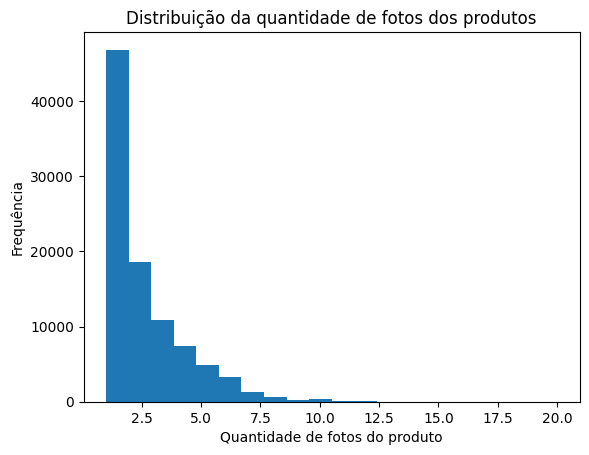

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['product_photos_qty'], bins=20)
plt.xlabel('Quantidade de fotos do produto')
plt.ylabel('Frequência')
plt.title('Distribuição da quantidade de fotos dos produtos')
plt.show()

In [ ]:
print(df2['flag_customers'].value_counts(normalize=True) * 100)
print(df2[['flag_entrega']].mean() * 100)

flag_customers
0    78.522072
1    21.477928
Name: proportion, dtype: float64
flag_entrega    8.086977
dtype: float64


In [ ]:
X = df2[
    [
        'flag_entrega',
        'product_photos_qty',
        'log_valor_venda',
        'log_valor_frete',
        'product_weight_g',
        'volume_product',
        'distancia_km'
    ]
]

X = sm.add_constant(X)

vif = pd.DataFrame()
vif['variavel'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,variavel,VIF
0,const,47.993757
1,flag_entrega,1.005724
2,product_photos_qty,1.006192
3,log_valor_venda,1.390249
4,log_valor_frete,1.996127
5,product_weight_g,3.072738
6,volume_product,2.883817
7,distancia_km,1.361471


### Modelo logit

In [ ]:
X = df2[
    [
        'flag_entrega',
        'product_photos_qty',
        'log_valor_venda',
        'log_valor_frete',
        'product_weight_g',
        'volume_product',
        'distancia_km'
    ]
]

X = sm.add_constant(X)
y = df2['flag_customers']

modelo = sm.Logit(y, X)
resultado = modelo.fit(cov_type='HC3')

resultado.summary()

Optimization terminated successfully.
         Current function value: 0.474423
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         flag_customers   No. Observations:                94646
Model:                          Logit   Df Residuals:                    94638
Method:                           MLE   Df Model:                            7
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                 0.08803
Time:                        18:16:08   Log-Likelihood:                -44902.
converged:                       True   LL-Null:                       -49237.
Covariance Type:                  HC3   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8773      0.061    -47.378      0.000      -2.996      -2.758
flag_entrega           2.2203      0.026     85.242      0.000       2.169       2.271
product_photos_qty    -0.0114      0.005     -2.328      0.020      -0.021      -0.002
log_valor_venda       -0.0382      0.011     -3.557      0.000      -0.059      -0.017
log_valor_frete        0.5387      0.023     23.687      0.000       0.494       0.583
product_weight_g   -1.767e-05   3.96e-06     -4.459      0.000   -2.54e-05    -9.9e-06
volume_product     -9.601e-07   6.02e-07     -1.595      0.111   -2.14e-06     2.2e-07
distancia_km          -0.0001   1.67e-05     -6.196      0.000      -0.000   -7.09e-05
======================================================================================
"""

In [ ]:
odds_ratio = np.exp(resultado.params)

odds_ratio_df = pd.DataFrame({
    'variavel': odds_ratio.index,
    'odds_ratio': odds_ratio.values
})

odds_ratio_df

,variavel,odds_ratio
0,const,0.056284
1,flag_entrega,9.210100
2,product_photos_qty,0.988636
3,log_valor_venda,0.962482
4,log_valor_frete,1.713851
5,product_weight_g,0.999982
6,volume_product,0.999999
7,distancia_km,0.999896
